## Air Quality Index Analysis

In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# for handle missing values
from sklearn.impute import SimpleImputer

from warnings import filterwarnings
import inflection

plt.style.use("dark_background")
filterwarnings("ignore")

In [23]:
df = pd.read_csv("../data/raw/city_hour.csv")

### **Initial Dataset Exploration**

##### **01-Tradational Analysis**

In [24]:
df_shape = df.shape
print(f"dataset have {df_shape[0]} rows & {df_shape[1]} columns")

dataset have 707875 rows & 16 columns


In [25]:
df.sample(5).reset_index()    # 5 random samples

,index,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,516712,Lucknow,2019-09-07 03:00:00,29.86,NaN,7.08,15.60,16.35,29.58,0.95,4.14,29.04,0.94,1.46,NaN,92.0,Satisfactory
1,197485,Chennai,2016-02-10 15:00:00,50.08,NaN,3.47,12.57,9.62,0.04,0.85,3.17,47.60,2.92,11.69,NaN,235.0,Poor
2,571234,Mumbai,2020-05-27 21:00:00,10.63,46.11,16.99,7.62,24.62,5.40,0.24,6.20,18.74,0.77,NaN,NaN,59.0,Satisfactory
3,176671,Brajrajnagar,2020-01-24 00:00:00,95.37,192.32,21.45,11.22,36.25,78.62,0.80,4.84,12.46,0.00,NaN,NaN,201.0,Poor
4,314350,Gurugram,2017-11-10 13:00:00,346.26,NaN,8.70,23.16,20.01,NaN,1.01,5.81,93.58,0.95,1.63,NaN,513.0,Severe


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707875 entries, 0 to 707874
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   City        707875 non-null  object 
 1   Datetime    707875 non-null  object 
 2   PM2.5       562787 non-null  float64
 3   PM10        411138 non-null  float64
 4   NO          591243 non-null  float64
 5   NO2         590753 non-null  float64
 6   NOx         584651 non-null  float64
 7   NH3         435333 non-null  float64
 8   CO          621358 non-null  float64
 9   SO2         577502 non-null  float64
 10  O3          578667 non-null  float64
 11  Benzene     544229 non-null  float64
 12  Toluene     487268 non-null  float64
 13  Xylene      252046 non-null  float64
 14  AQI         578795 non-null  float64
 15  AQI_Bucket  578795 non-null  object 
dtypes: float64(13), object(3)
memory usage: 86.4+ MB


In [27]:
df.describe()          # summary statstics of numerical columns

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,562787.000000,411138.000000,591243.000000,590753.000000,584651.000000,435333.000000,621358.000000,577502.000000,578667.000000,544229.000000,487268.000000,252046.000000,578795.000000
mean,67.622994,119.075804,17.421755,28.885157,32.287565,23.607959,2.183539,14.038307,34.798979,3.087595,8.660927,3.130537,166.413500
std,74.730496,104.224752,32.095211,29.162194,39.756669,28.831900,10.970514,19.305540,29.806379,16.456599,21.741023,7.834832,162.112729
min,0.010000,0.010000,0.010000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,8.000000
25%,26.200000,52.380000,3.840000,10.810000,10.660000,8.120000,0.420000,4.880000,13.420000,0.050000,0.370000,0.100000,79.000000
50%,46.420000,91.500000,7.960000,20.320000,20.790000,15.380000,0.800000,8.370000,26.240000,0.860000,2.590000,0.790000,116.000000
75%,79.490000,147.520000,16.150000,36.350000,37.150000,29.230000,1.370000,14.780000,47.620000,2.750000,8.410000,3.120000,208.000000
max,999.990000,1000.000000,499.990000,499.510000,498.610000,499.970000,498.570000,199.960000,497.620000,498.070000,499.400000,499.990000,3133.000000


In [28]:
df.describe(include="O")       # summary statstics of categorical columns

,City,Datetime,AQI_Bucket
count,707875,707875,578795
unique,26,48192,6
top,Ahmedabad,2020-06-29 01:00:00,Moderate
freq,48192,26,198991


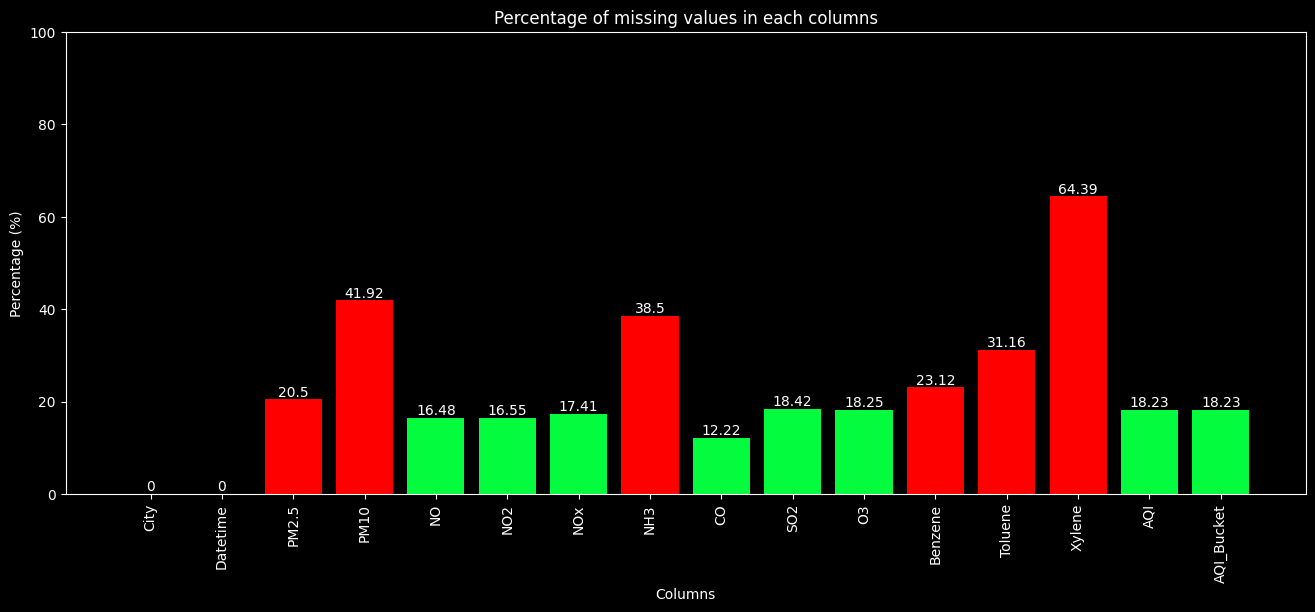

In [29]:
# percentage of missing values in each columns
nan_percentage = list(map(lambda x: round(x, 2), list(df.isna().mean() * 100)))  

plt.figure(figsize=(16, 6))

# conditional formatting : red if  percentage greater than 20 else green
conditional_colors = ["#03fc3d" if each < 20 else "red" for each in nan_percentage]  

fig = plt.bar(x=df.columns, height=nan_percentage, color=conditional_colors)
plt.xticks(rotation=90)
plt.bar_label(fig)
plt.title("Percentage of missing values in each columns")
plt.ylabel("Percentage (%)")
plt.xlabel("Columns")
plt.ylim(0,100)
plt.show()

### **Data Cleaning**

##### **02-Data Type Conversion**

In [30]:
df.dtypes    # before

City           object
Datetime       object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object

In [31]:
df["Datetime"] = pd.to_datetime(df["Datetime"])     # convert datetime columns (type: object) to (type: datetime)
df.dtypes    # after

City                  object
Datetime      datetime64[ns]
PM2.5                float64
PM10                 float64
NO                   float64
NO2                  float64
NOx                  float64
NH3                  float64
CO                   float64
SO2                  float64
O3                   float64
Benzene              float64
Toluene              float64
Xylene               float64
AQI                  float64
AQI_Bucket            object
dtype: object

##### **03-convert column name style into snake_case**

In [32]:
df.columns     # before

Index(['City', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [33]:
df.columns = [inflection.underscore(column) for column in df.columns]
df.columns     # after

Index(['city', 'datetime', 'pm2.5', 'pm10', 'no', 'no2', 'n_ox', 'nh3', 'co',
       'so2', 'o3', 'benzene', 'toluene', 'xylene', 'aqi', 'aqi_bucket'],
      dtype='object')

##### **04-Handle Missing Values**

In [34]:
numeric_cols = list(df.select_dtypes(np.number).columns)
categorical_cols = list(df.select_dtypes("object").columns)

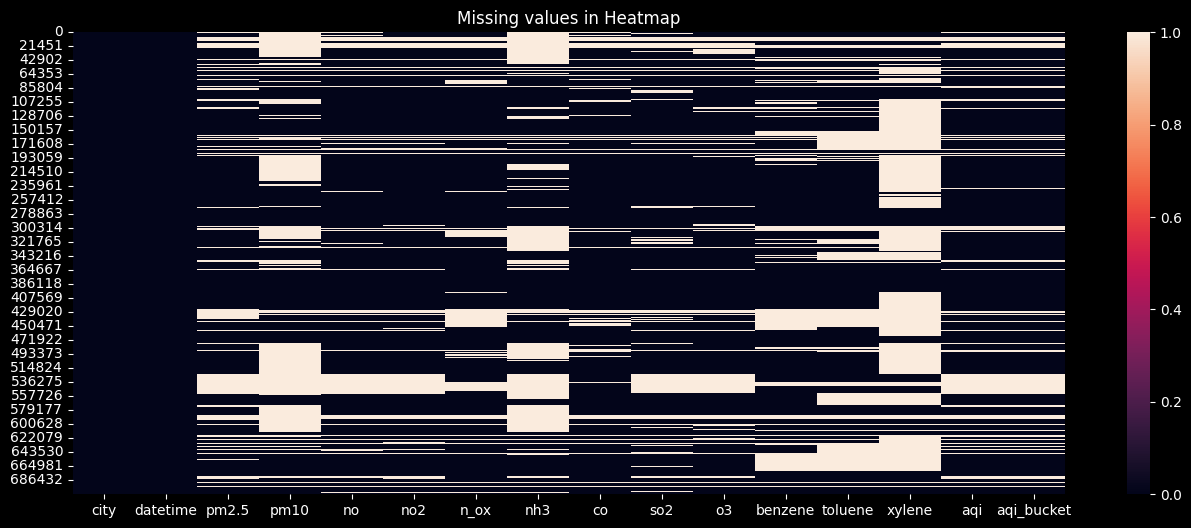

In [35]:
plt.figure(figsize=(16,6))
sns.heatmap(df.isna())
plt.title("Missing values in Heatmap")
plt.show()

**condition**

**-> if `missing value count > 50%` then `drop column/row`**

**-> if `missing value count < 20` then `use simple imputers`**

**-> if `missing value count between 50 and 20` then `use knn imputer`**

In [36]:
print(df.isna().mean()*100)

city           0.000000
datetime       0.000000
pm2.5         20.496274
pm10          41.919407
no            16.476355
no2           16.545577
n_ox          17.407593
nh3           38.501430
co            12.222073
so2           18.417517
o3            18.252940
benzene       23.117923
toluene       31.164683
xylene        64.393996
aqi           18.234858
aqi_bucket    18.234858
dtype: float64


In [37]:
"""
> drop column & rows which have missing values > 50%
"""
unwanted_col = df.columns[df.isna().mean() * 100 > 50]
df = df.drop(unwanted_col, axis=1)    # for columns

df = df.loc[df.isna().mean(axis=1)*100 < 50]    # for rows

In [38]:
df.isna().mean()*100

city           0.000000
datetime       0.000000
pm2.5          6.975970
pm10          32.108733
no             2.391373
no2            2.589689
n_ox           7.718246
nh3           28.454795
co             3.790507
so2            4.825290
o3             4.595688
benzene       15.810445
toluene       25.136073
aqi            5.573029
aqi_bucket     5.573029
dtype: float64

In [39]:
"""
> TARGET COLUMN : aqi
> we cannot impute missing values in TARGET VARIABLE 
> it just 5%, so we can drop those samples
"""
df = df.loc[df["aqi"].dropna().index]

**Skewness of numerical columns**

In [40]:
"""
> calculate skewness of columns
"""
skewness = {}
for column in df.select_dtypes(np.number).columns:
    skew_value = df[column].skew()
    skewness[column] = {"skewness" : skew_value, "status" : "+ve skew" if skew_value > 0 else "-ve skew"}
    
pd.DataFrame(skewness).T

,skewness,status
pm2.5,4.214536,+ve skew
pm10,2.484969,+ve skew
no,5.322994,+ve skew
no2,3.274186,+ve skew
n_ox,3.647041,+ve skew
nh3,5.281994,+ve skew
co,20.512254,+ve skew
so2,4.44902,+ve skew
o3,1.679779,+ve skew
benzene,21.943066,+ve skew


**Median imputer**

In [41]:
"""
> All the columns follow positive skewness, so we can choose imputer as median
> Handle missing values with median
"""
missing_cols = df.columns[df.isna().mean()*100 > 0]
median_imputer = SimpleImputer(strategy="median")
for each in missing_cols:
    df[each] = median_imputer.fit_transform(df[each].to_numpy().reshape(-1, 1))

In [42]:
df.isna().mean()*100

city          0.0
datetime      0.0
pm2.5         0.0
pm10          0.0
no            0.0
no2           0.0
n_ox          0.0
nh3           0.0
co            0.0
so2           0.0
o3            0.0
benzene       0.0
toluene       0.0
aqi           0.0
aqi_bucket    0.0
dtype: float64

##### **05-Outlier Treatment**

In [43]:
df.head()

,city,datetime,pm2.5,pm10,no,no2,n_ox,nh3,co,so2,o3,benzene,toluene,aqi,aqi_bucket
680,Ahmedabad,2015-01-29 09:00:00,80.47,92.0,1.42,21.90,20.65,15.87,1.42,32.26,46.71,0.0,0.0,288.0,Poor
681,Ahmedabad,2015-01-29 10:00:00,87.80,92.0,2.03,19.87,22.22,15.87,2.03,78.95,21.88,0.0,0.0,181.0,Moderate
682,Ahmedabad,2015-01-29 11:00:00,90.53,92.0,1.72,20.11,22.12,15.87,1.72,95.86,67.67,0.0,0.0,182.0,Moderate
683,Ahmedabad,2015-01-29 12:00:00,83.53,92.0,0.75,16.35,16.48,15.87,0.75,44.91,88.92,0.0,0.0,182.0,Moderate
684,Ahmedabad,2015-01-29 13:00:00,68.40,92.0,0.58,13.73,12.50,15.87,0.58,34.57,116.75,0.0,0.0,179.0,Moderate
